<img src="../img/htw-logo.png" width=150>


**I758 Wissens- und KI-basierte Systeme**

# Explorative Datenanalyse - Teil 1: Datenqualität erkunden & korrigieren
(c) Ricardo Knauer, Raphael Wallsberger, Christina Kratsch

<font color="green"><b>KLAUSURTAUGLICH.</b></font>
Dieses Notebook gehört zu den fünf Notebooks, die Sie für die Klausur einreichen können. Bei vollständiger und korrekter Bearbeitung **erhalten Sie Punkte für die Abgabe, die zu Ihrer Klausur addiert werden.**


In der Realität sind Datensätze selten so gutartig wie unsere Maschinendaten aus der letzten Übung. Regelmäßig kommt es im Alltag zu "unerwarteten" Datenwerten. Ein guter Data Scientist verwendet deshalb einen wesentlichen Anteil seiner Zeit damit, die Qualität der Daten zu überprüfen und ggf. für die gestellte Aufgabe optimieren. Dies ist eine Wissenschaft für sich (sogenanntes *Data Engineering*), hier erhalten Sie nur einen ersten Einblick. 

Nehmen wir an, wir hätten nur eine deutlich schlechtere Messreihe zur Verfügung. Alles, was wir wissen, ist, dass mit den Daten etwas "nicht in Ordnung" ist. Wir müssen uns langsam vortasten. Die schlechte Messreihe finden Sie in einer anderen Datei:

In [1]:
import pandas as pd

df = pd.read_csv("data/machine_data broken.csv", sep=";")
df.head()

,Maschine,Mode,Produkt,Strom / A,Drehmoment / Nm,Drehzahl / 1/min,Temp Umgebung / degC,Temp Umrichter / degC,Temp Werkzeug / degC,Bearbeitungszeit / s
0,A,2.0,X,NaN,"48,64",1463,"21,5","23,3","95,1","21,4"
1,B,2.0,Y,NaN,"50,92",1462,"20,9","22,8","98,2","24,8"
2,C,2.0,X,NaN,"46,85",1462,"21,3","23,8","93,1","21,4"
3,B,2.0,Y,NaN,"49,69",1463,"21,5","24,4","97,7",NaN
4,C,3.0,X,"26,195","53,29",1462,NaN,"25,3","104,1","19,9"


Der Datensatz ist deutlich kleiner - aber immerhin stimmt das Format:

In [1]:
df.shape

NameError: name 'df' is not defined

Mit ```.info()``` bekommen Sie einen Einblick in die Datentypen jeder Spalte:

In [ ]:
df.info()

Hier zeigt sich das erste Problem: einige Werte scheinen in den Spalten zu fehlen, der ```Non-Null Count``` entspricht nämlich nicht für jede Spalte der Zeilenzahl.
Außerdem erkennen wir einen Fehler beim Einlesen der Daten: die meisten Spalten sind vom Typ ```object```. Soll heißen: Pandas erkennt nicht, dass es sich um numerische Werte handelt. Dies lässt sich einfach erklären - wir haben beim Einlesen nicht erwähnt, dass die Zahlen nicht mit der "deutschen" Schreibweise mit Komma als Trennzeichen notiert sind. Eine leidige und typische Fehlerquelle im Umgang mit Daten (die sich leider meist erst durch sehr kryptische Fehler weiter unten in den Pipeline bemerkbar macht).

Also nochmal - lassen Sie uns ```df``` nochmal überschreiben:

In [7]:
import pandas as pd
df = pd.read_csv("data/machine_data broken.csv", sep=";", decimal=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Maschine               299 non-null    object 
 1   Mode                   298 non-null    float64
 2   Produkt                299 non-null    object 
 3   Strom / A              285 non-null    float64
 4   Drehmoment / Nm        299 non-null    float64
 5   Drehzahl / 1/min       299 non-null    int64  
 6   Temp Umgebung / degC   298 non-null    float64
 7   Temp Umrichter / degC  298 non-null    float64
 8   Temp Werkzeug / degC   298 non-null    float64
 9   Bearbeitungszeit / s   245 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 23.5+ KB


Viel besser! Aber da ist noch das Problem mit den fehlenden Werten. die letzte Spalte (Bearbeitungszeit) und auch einige andere Spalten scheinen unter Datenfehlern zu leiden.

Wir können es uns einfach machen. Nutzen Sie die  eingebauten Funktionen ```.isnull``` und ```.sum```, um die Nullwerte zu zählen:

In [8]:
import pandas as pd
df = pd.read_csv("data/machine_data broken.csv", sep=";", decimal=",")
df.info()
null_counts = df.isnull().sum()
print("Anzahl der Nullwerte pro Spalte:")
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Maschine               299 non-null    object 
 1   Mode                   298 non-null    float64
 2   Produkt                299 non-null    object 
 3   Strom / A              285 non-null    float64
 4   Drehmoment / Nm        299 non-null    float64
 5   Drehzahl / 1/min       299 non-null    int64  
 6   Temp Umgebung / degC   298 non-null    float64
 7   Temp Umrichter / degC  298 non-null    float64
 8   Temp Werkzeug / degC   298 non-null    float64
 9   Bearbeitungszeit / s   245 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 23.5+ KB
Anzahl der Nullwerte pro Spalte:
Maschine                  0
Mode                      1
Produkt                   0
Strom / A                14
Drehmoment / Nm           0
Drehzahl / 1/min          0
Temp Um

Die Spalte *Bearbeitungszeit / s* scheint massiv von unserem Problem betroffen. Hier fehlen so viele Werte, dass wir davon ausgehen können, dass die Spalte praktisch wertlos ist. Entfernen Sie mit `del` die Spalte aus dem Data Frame!

In [13]:
import pandas as pd
df = pd.read_csv("data/machine_data broken.csv", sep=";", decimal=",")
del df["Bearbeitungszeit / s"]
print(df.to_string(index=False))

Maschine  Mode Produkt  Strom / A  Drehmoment / Nm  Drehzahl / 1/min  Temp Umgebung / degC  Temp Umrichter / degC  Temp Werkzeug / degC
       A   2.0       X        NaN            48.64              1463                  21.5                   23.3                  95.1
       B   2.0       Y        NaN            50.92              1462                  20.9                   22.8                  98.2
       C   2.0       X        NaN            46.85              1462                  21.3                   23.8                  93.1
       B   2.0       Y        NaN            49.69              1463                  21.5                   24.4                  97.7
       C   3.0       X     26.195            53.29              1462                   NaN                   25.3                 104.1
       A   1.0       Y     19.847            45.14              1460                  20.2                   22.5                  89.3
       A   1.0       Y     20.524            46.

Gut zu wissen: für komplizierte Verfahren gibt es die mächtige Funktion ```.dropna```, die Spalten anhand fester Qualitätskriterien entfernen kann. Die wollen wir hier aber heute **nicht** einsetzen. Führen Sie den auskommentierten Code NICHT aus.

In [14]:
# Drop any rows which have any NaNs 
#df.dropna(axis=0) 
# Drop columns with over 70% non-NaNs 
#df.dropna(thresh=int(df.shape[0] * .7), axis=1)

Die Spalte *Strom / A* ist uns wichtig - aber auch hier fehlen massiv Werte. Schauen wir uns die Spalte nochmal an:

In [15]:
df["Strom / A"]

0         NaN
1         NaN
2         NaN
3         NaN
4      26.195
        ...  
294    22.472
295    20.123
296    23.154
297    22.347
298    23.761
Name: Strom / A, Length: 299, dtype: float64

Pandas bietet die Funktion ```.fillna```, mit der leere Werte gefunden und neu gesetzt werden können. Zum Beispiel auf 0:

In [16]:
df['Strom / A'].fillna(0.0)

0       0.000
1       0.000
2       0.000
3       0.000
4      26.195
        ...  
294    22.472
295    20.123
296    23.154
297    22.347
298    23.761
Name: Strom / A, Length: 299, dtype: float64

Achtung: achten Sie nochmal auf den Code der letzten Zeile, und dann schauen Sie sich nochmal die Werte in ```df``` an. Fällt Ihnen etwas auf? Wie hat sich ```df``` verändert?

In [17]:
df

,Maschine,Mode,Produkt,Strom / A,Drehmoment / Nm,Drehzahl / 1/min,Temp Umgebung / degC,Temp Umrichter / degC,Temp Werkzeug / degC
0,A,2.0,X,NaN,48.64,1463,21.5,23.3,95.1
1,B,2.0,Y,NaN,50.92,1462,20.9,22.8,98.2
2,C,2.0,X,NaN,46.85,1462,21.3,23.8,93.1
3,B,2.0,Y,NaN,49.69,1463,21.5,24.4,97.7
4,C,3.0,X,26.195,53.29,1462,NaN,25.3,104.1
...,...,...,...,...,...,...,...,...,...
294,B,2.0,Y,22.472,50.24,1461,20.6,23.9,97.5
295,A,1.0,Y,20.123,45.67,1463,21.3,22.6,90.0
296,C,2.0,X,23.154,47.19,1460,20.6,24.5,93.8
297,B,2.0,Y,22.347,49.99,1460,19.6,23.8,97.5


Noch mehr Aufgaben für Sie: wie sicher fühlen Sie sich mit Data Science? Versuchen Sie doch mal, die fehlenden Werte nicht durch 0.0, sondern durch etwas intelligenteres zu ersetzen, zum Beispiel den Mittelwert oder den Median. Schreiben sie die Spalte jetzt auch wieder in den Data Frame zurück, damit sich `df` tatsächlich ändert:

In [19]:
import pandas as pd

df = pd.read_csv("data/machine_data broken.csv", sep=";", decimal=",")
mean_value = df["Bearbeitungszeit / s"].mean()
df["Bearbeitungszeit / s"] = df["Bearbeitungszeit / s"].fillna(mean_value)
print(df.to_string(index=False))

Maschine  Mode Produkt  Strom / A  Drehmoment / Nm  Drehzahl / 1/min  Temp Umgebung / degC  Temp Umrichter / degC  Temp Werkzeug / degC  Bearbeitungszeit / s
       A   2.0       X        NaN            48.64              1463                  21.5                   23.3                  95.1             21.400000
       B   2.0       Y        NaN            50.92              1462                  20.9                   22.8                  98.2             24.800000
       C   2.0       X        NaN            46.85              1462                  21.3                   23.8                  93.1             21.400000
       B   2.0       Y        NaN            49.69              1463                  21.5                   24.4                  97.7             23.031429
       C   3.0       X     26.195            53.29              1462                   NaN                   25.3                 104.1             19.900000
       A   1.0       Y     19.847            45.14  

Plotten Sie nun zum Abschluss ihre Daten nochmal, zum Beispiel als Scatter Plot zwischen Strom und Drehmoment und betrachten Sie das Ergebnis Ihrer Arbeit. Vielleicht fällt Ihnen ja noch ein drittes Problem in unserem Datensatz auf? Schauen Sie mal in die "Ecken" des Plots!

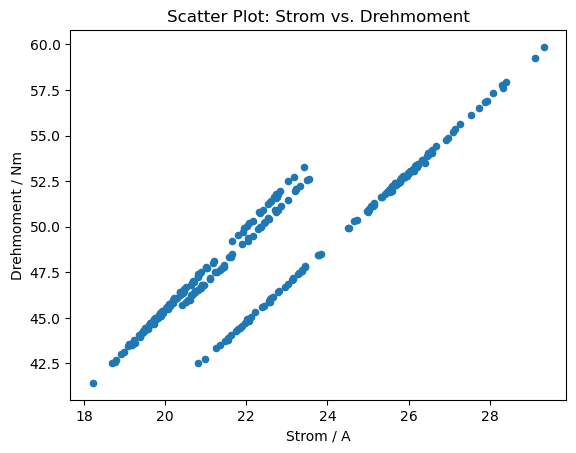

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/machine_data broken.csv", sep=";", decimal=",")
df.plot(kind="scatter", x="Strom / A", y="Drehmoment / Nm", title="Scatter Plot: Strom vs. Drehmoment")
plt.show()

# Explorative Datenanalyse - Teil 2: Daten skalieren und verarbeiten mit `scikit learn`
(c) Christina Kratsch

Viele Machine Learning Algorithmen machen Annahmen über ihre Daten, z.B. über die zugrundeliegende statistische Verteilung, den Wertebereich oder den Datentyp. Die Data Science Bibliothek `scikit learn` bietet neben einer extrem umfangreichen Sammlung an Algorithemn (und einer exzellenten Dokumentation) auch mit `sklearn.preprocessing` eine Bibliothek zur Vorverarbeitung von Daten.

## Skalieren und Normalisieren

Zuerst importieren wir die notwendigen Bibliotheken und laden unsere Daten.

In [21]:
import numpy as np
from sklearn import preprocessing

# Angenommen, dies sind unsere Daten
X_train = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])

Die Standardisierung von Datensätzen ist eine gängige Anforderung für viele Machine-Learning-Schätzer. Sie könnten sich schlecht verhalten, wenn die einzelnen Merkmale nicht mehr oder weniger wie standardnormalverteilte Daten aussehen: Gaussian mit Null-Mittelwert und Einheitsvarianz.

**Aufgabe:** Überlegen Sie einen Moment, was ein Grund sein könnte, warum die Syntax des `StandardScaler` so umständlich ist. Schauen Sie ggf. auch in der [Dokumentation](https://scikit-learn.org/stable/modules/preprocessing.html) nach!

In [22]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


**Aufgabe:**  legen Sie eine Kopie `df_num` Ihres Data Frames an. Nutzen Sie den StandardScaler, um alle Werte darin zu normalisieren. Funktioniert das? Was fällt Ihnen auf? Korrigieren Sie ggf. `df_num` entsprechend. Wie gehen Sie mit der Spalte `mode` um?

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/machine_data broken.csv", sep=";", decimal=",")
df_num = df.select_dtypes(include=["number"]).copy()
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
print(df_num_scaled.head())

       Mode  Strom / A  Drehmoment / Nm  Drehzahl / 1/min  \
0  0.112742        NaN        -0.061467          1.084738   
1  0.112742        NaN         0.261140          0.572358   
2  0.112742        NaN        -0.314742          0.572358   
3  0.112742        NaN         0.087102          1.084738   
4  1.512621   1.383341         0.596481          0.572358   

   Temp Umgebung / degC  Temp Umrichter / degC  Temp Werkzeug / degC  \
0              0.401101              -0.435613             -0.063162   
1             -0.038071              -0.897580              0.462504   
2              0.254710               0.026354             -0.402301   
3              0.401101               0.580714              0.377719   
4                   NaN               1.412255              1.462964   

   Bearbeitungszeit / s  
0             -0.796424  
1              0.863374  
2             -0.796424  
3                   NaN  
4             -1.528688  


Manchmal möchte man Daten in einem bestimmten Wertebereich (z.B. [0, 1]) haben, z.B. um sie als Wahrscheinlichkeiten interpretieren zu können. Auch dafür bietet `sklearn.preprocessing` Möglichkeiten:

In [25]:
X_train = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

**Aufgabe:** Skalieren Sie die Einträge in `df_num` auf den Wertebereich [-3, 3]!

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3, 3))
df_num_scaled_3 = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
print(df_num_scaled_3)

     Mode  Strom / A  Drehmoment / Nm  Drehzahl / 1/min  Temp Umgebung / degC  \
0     0.0        NaN        -2.608188          0.818182             -0.214286   
1     0.0        NaN        -2.484286          0.272727             -0.642857   
2     0.0        NaN        -2.705461          0.272727             -0.357143   
3     0.0        NaN        -2.551128          0.818182             -0.214286   
4     3.0   1.307554        -2.355493          0.272727                   NaN   
..    ...        ...              ...               ...                   ...   
294   0.0  -0.703610        -2.521239         -0.272727             -0.857143   
295  -3.0  -1.972540        -2.769586          0.818182             -0.357143   
296   0.0  -0.335194        -2.686985         -0.818182             -0.857143   
297   0.0  -0.771135        -2.534825         -0.818182             -1.571429   
298   0.0  -0.007293        -2.619600         -0.818182             -1.571429   

     Temp Umrichter / degC 

## Umgang mit kategorischen Variablen

Wir haben noch einige Spalten in unseren Maschinendaten, die wir nicht adressiert haben: die kategorischen Werte wie z.B. die Produkt-Klasse. Manche ML-Verfahren können aber grundsätzlich nur mit numerischen Werten umgehen. 

Die einfachste Möglichkeit, Kategorien in Zahlen umzuwandeln, ist, diese einfach zu "übersetzen", wie es im folgenden Beispiel mit drei Variablen passiert:

In [2]:
from sklearn.preprocessing import OrdinalEncoder

X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc = OrdinalEncoder()
enc.fit(X)
encoded_values = enc.transform([['female', 'from US', 'uses Safari']])
print(encoded_values)

[[0. 1. 1.]]


**Aufgabe:** erweitern Sie das Beispiel um weitere Belegungen (zum Beispiel das Geschlecht _non_binary_ oder die Herkunft _from Korea_) und kodieren Sie eine Beispiel-Belegung.

In [32]:
from sklearn.preprocessing import OrdinalEncoder

X = [
    ['male', 'from Russia', 'uses Chrome'], ['female', 'from America', 'uses Firefox'],   ['non_binary', 'from Korea', 'uses Chrome'] 
]

enc = OrdinalEncoder()
enc.fit(X)
encoded_example = enc.transform([['female', 'from America', 'uses Firefox']])
print(encoded_example)

[[0. 0. 1.]]


**Aufgabe:** was passiert, wenn einer der Werte nicht definiert ist (nutzen Sie `np.nan`)? Was macht die Belegung  `encoded_missing_value`?

In [8]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
X = [
     ['male', 'from Russia', 'uses Chrome'], ['female', np.nan, 'uses Firefox'],   ['non_binary', 'from Korea', 'uses Chrome'] 
]

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(X)
encoded_missing_value = enc.transform([['female', np.nan, 'uses Safari']])
print(encoded_missing_value)

[[ 0. nan -1.]]


**Aufgabe:** Zum Schluss wird es nochmal kniffelig. Informieren Sie sich, was ein [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) macht und kodieren Sie eine kategorische Spalte unseres Maschinendatensatzes (`df`). Achten Sie, wenn möglich, auch darauf, was mit fehlenden Werten passiert!

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
data = {'Kategorie': ['A', 'B', 'A', 'C', 'B']}
df = pd.DataFrame(data)
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Kategorie']]).toarray()
result_df = pd.DataFrame(encoded_data, columns=[f'{col}_{val}' for val in encoder.categories_[0] for col in ['Kategorie']])
print(result_df)

   Kategorie_A  Kategorie_B  Kategorie_C
0          1.0          0.0          0.0
1          0.0          1.0          0.0
2          1.0          0.0          0.0
3          0.0          0.0          1.0
4          0.0          1.0          0.0


Klasse! Sie haben jetzt einen grundlegenden Überblick über die Möglichkeiten zur Manipulation von Daten gewonnen. Nicht alle Methoden erscheinen Ihnen vielleicht jetzt bereits umfassend sinnvoll - wenn wir weiter voranschreiten, werden Sie aber viele ML-Algorithmen kennenlernen, die auf den hier genannten Verfahren aufbauen. Wenn die Qualität Ihres ML-Tools einmal nicht gut ist, kehren Sie in dieses Tutorial zurück und überlegen Sie, wie Sie vielleicht die Ausgangsdaten "optimieren" können!